In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

np.random.seed(1)
sns.set_style('darkgrid')

In [58]:
# import the dataset from file
dataset = pd.read_csv("./dataset_v3-easy.csv")

In [65]:
dataset.head()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area
0,0,81,20,20,tech,Oslo,257,1095
1,1,21,6,5,tech,Bergen,46,262
2,2,40,11,10,tech,Trondheim,106,520
3,3,81,56,17,finance,Oslo,257,1162
4,4,75,52,14,finance,Bergen,234,1549


In [66]:
# turns 'industry' into numerical values; 0 for finance and 1 for tech
dataset['industry_numeric'] = pd.Categorical(dataset['industry']).codes
dataset.head()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,industry,city,sqm_social_zones,sqm_net_area,industry_numeric
0,0,81,20,20,tech,Oslo,257,1095,1
1,1,21,6,5,tech,Bergen,46,262,1
2,2,40,11,10,tech,Trondheim,106,520,1
3,3,81,56,17,finance,Oslo,257,1162,0
4,4,75,52,14,finance,Bergen,234,1549,0


In [67]:
# quick overview of metadata
dataset.describe()

,id,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,1000.000000,72.907546,87.022489,66.133433,282.869065,1237.439780,0.497251
std,577.783264,40.857887,2234.963816,2235.163948,2236.029199,891.448827,0.500117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.000000,43.000000,12.000000,10.000000,117.000000,623.000000,0.000000
50%,1000.000000,63.000000,23.000000,15.000000,188.000000,1000.000000,0.000000
75%,1500.000000,92.000000,48.000000,21.000000,300.000000,1555.000000,1.000000
max,2000.000000,250.000000,100000.000000,100000.000000,100000.000000,4702.000000,1.000000


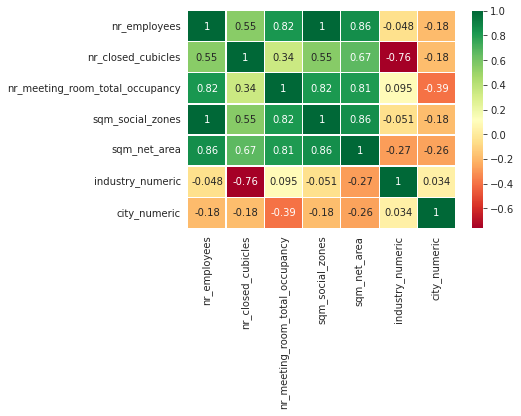

In [153]:
# analyze how well the different parameters correlate before data cleaning
sns.heatmap(new_dataset.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)

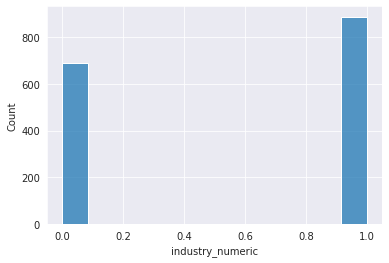

In [114]:
# histogram of the two industries; tech and finance
sns.histplot(data = new_dataset, x = "industry_numeric")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


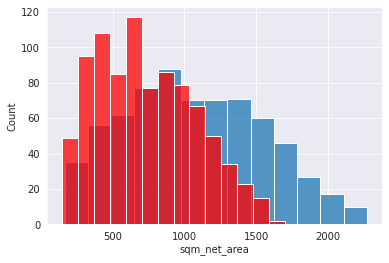

In [115]:
# histogram with regards to industries and total area
sns.histplot(data = new_dataset[(dataset['industry_numeric'] == 0)], x = "sqm_net_area")
sns.histplot(data = new_dataset[(dataset['industry_numeric'] == 1)], x = "sqm_net_area", color = "red")

In [154]:
new_dataset.describe()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric,city_numeric
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,42.703775,16.239109,10.212004,117.266215,645.984511,0.614714,1.071636
std,13.338735,10.944094,3.762907,45.081062,279.208422,0.486898,0.859680
min,15.000000,3.000000,3.000000,29.000000,147.000000,0.000000,0.000000
25%,32.000000,9.000000,7.000000,80.000000,417.000000,0.000000,0.000000
50%,44.000000,12.000000,10.000000,120.000000,632.000000,1.000000,1.000000
75%,54.000000,21.000000,13.000000,155.000000,839.000000,1.000000,2.000000
max,65.000000,53.000000,24.000000,196.000000,1568.000000,1.000000,2.000000


In [211]:
new_dataset[(new_dataset['nr_closed_cubicles'] < 60)]

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric,city_numeric
1,21,6,5,46,262,1,0
2,40,11,10,106,520,1,2
5,62,37,13,185,1140,0,2
15,54,12,10,155,551,1,1
17,31,6,7,77,360,1,1
...,...,...,...,...,...,...,...
1996,16,9,4,32,219,0,2
1997,42,21,10,113,616,0,2
1998,43,22,10,117,740,0,2
1999,16,8,3,32,167,0,2


In [101]:
new_dataset.drop(8, inplace=True)

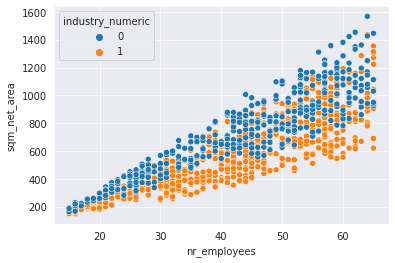

In [152]:
sns.scatterplot(data = new_dataset[(new_dataset['nr_employees'] < 150)], x = 'nr_employees', y = 'sqm_net_area', hue = 'industry_numeric', marker = 'o')

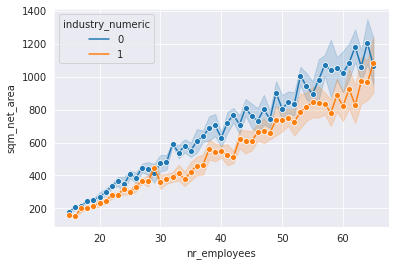

In [157]:
sns.lineplot(data = new_dataset[(new_dataset['nr_employees'] < 100)], x = 'nr_employees', y = 'sqm_net_area', hue = 'industry_numeric', marker = 'o')

In [146]:
# removing outliers in either direction
new_dataset.drop(new_dataset[(new_dataset['nr_employees'] > 65)].index, inplace = True)
new_dataset['nr_employees'].describe()

count    1033.000000
mean       42.703775
std        13.338735
min        15.000000
25%        32.000000
50%        44.000000
75%        54.000000
max        65.000000
Name: nr_employees, dtype: float64

In [73]:
from sklearn.linear_model import LinearRegression

In [158]:
# splits dataset into training and test set
training_dataset, testing_dataset = train_test_split(new_dataset, test_size = 0.2, shuffle = True)

In [159]:
# removes the label from the training dataset
training_x = training_dataset.drop('sqm_net_area', axis = 1)
training_y = training_dataset['sqm_net_area']
training_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric,city_numeric
697,56,15,17,163,1,0
53,51,11,11,145,1,1
1405,54,43,11,155,0,1
853,23,6,5,52,1,2
237,32,6,7,80,1,1


In [160]:
# doing the same as above
testing_x = testing_dataset.drop('sqm_net_area', axis = 1)
testing_y = testing_dataset['sqm_net_area']
testing_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric,city_numeric
1874,35,21,7,90,0,2
1772,30,18,6,74,0,2
718,64,14,22,192,1,0
529,52,11,19,148,1,0
891,36,6,8,93,1,2


In [161]:
# training AI with standard linear regression
linreg_model = LinearRegression().fit(training_x, training_y)

In [163]:
# testing how the AI fares
linreg_model.score(testing_x, testing_y)

0.8234690125780944

In [174]:
# training the AI with quadratic features to better fit the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(training_x, training_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [175]:
# testing the AI once more
# as we can see the AI fares better with quadratic features
polyreg_model.score(testing_x, testing_y)

0.8848994949174652

In [177]:
# grouping the Dataframe based on industry, and placing them in two different dataframes
grouped = new_dataset.groupby(new_dataset.industry_numeric)
new_dataset_finance = grouped.get_group(0)
new_dataset_tech = grouped.get_group(1)
new_dataset_finance.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric,city_numeric
5,62,37,13,185,1140,0,2
1008,53,41,12,152,765,0,1
1012,45,34,10,124,650,0,1
1013,63,52,15,188,1121,0,1
1030,64,52,11,192,1056,0,1


In [178]:
# tech Dataframe
new_dataset_tech.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric,city_numeric
1,21,6,5,46,262,1,0
2,40,11,10,106,520,1,2
15,54,12,10,155,551,1,1
17,31,6,7,77,360,1,1
20,52,11,9,148,460,1,1


In [179]:
# splits dataset into training and test set
training_dataset_finance, testing_dataset_finance = train_test_split(new_dataset_finance, test_size = 0.2, shuffle = True)
training_dataset_tech, testing_dataset_tech = train_test_split(new_dataset_tech, test_size = 0.2, shuffle = True)

In [181]:
# removes the label from both Dataframes, both training and testing sets
training_finance_x = training_dataset_finance.drop('sqm_net_area', axis = 1)
training_finance_y = training_dataset_finance['sqm_net_area']
training_tech_x = training_dataset_tech.drop('sqm_net_area', axis = 1)
training_tech_y = training_dataset_tech['sqm_net_area']
testing_finance_x = testing_dataset_finance.drop('sqm_net_area', axis = 1)
testing_finance_y = testing_dataset_finance['sqm_net_area']
testing_tech_x = testing_dataset_tech.drop('sqm_net_area', axis = 1)
testing_tech_y = testing_dataset_tech['sqm_net_area']
# checking to see if everything was split and arranged correctly
training_tech_x.head()

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,industry_numeric,city_numeric
547,46,10,15,127,1,0
173,45,10,9,124,1,1
786,20,5,5,43,1,2
858,37,8,7,96,1,2
161,50,11,11,141,1,1


In [182]:
# training finance AI with standard linear regression
linreg_model_finance = LinearRegression().fit(training_finance_x, training_finance_y)

In [183]:
# training tech AI with standard linear regression
linreg_model_tech = LinearRegression().fit(training_tech_x, training_tech_y)

In [184]:
# testing how the finance AI fares
linreg_model_finance.score(testing_finance_x, testing_finance_y)

0.8627366211244011

In [185]:
# testing how the tech AI fares
linreg_model_tech.score(testing_tech_x, testing_tech_y)

0.8530275131978756

In [207]:
# training the finance AI with quadratic features to better fit the dataset
degree = 2
polyreg_finance_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_finance_model.fit(training_finance_x, training_finance_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [208]:
# training the tech AI with quadratic features to better fit the dataset
degree = 2
polyreg_tech_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_tech_model.fit(training_tech_x, training_tech_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [209]:
# testing the finance AI with quadratic regression
polyreg_finance_model.score(testing_finance_x, testing_finance_y)

0.9016870950201067

In [210]:
# testing the tech AI with quadratic regression
polyreg_tech_model.score(testing_tech_x, testing_tech_y)

0.8996810733704881

In [ ]:
# grouping the Dataframe based on location, and placing them in three different dataframes
grouped = new_dataset.groupby(new_dataset.city_numeric)
new_dataset_Bergen = grouped.get_group(0)
new_dataset_Oslo = grouped.get_group(1)
new_dataset_Trondheim = grouped.get_group(2)

,nr_employees,nr_closed_cubicles,nr_meeting_room_total_occupancy,sqm_social_zones,sqm_net_area,industry_numeric,city_numeric
2,40,11,10,106,520,1,2
5,62,37,13,185,1140,0,2
750,57,12,13,166,938,1,2
751,34,9,8,86,434,1,2
752,22,6,4,49,295,1,2


In [215]:
# splits dataset into training and test set
training_dataset_Bergen, testing_dataset_Bergen = train_test_split(new_dataset_Bergen, test_size = 0.2, shuffle = True)
training_dataset_Oslo, testing_dataset_Oslo = train_test_split(new_dataset_Oslo, test_size = 0.2, shuffle = True)
training_dataset_Trondheim, testing_dataset_Trondheim = train_test_split(new_dataset_Trondheim, test_size = 0.2, shuffle = True)

In [ ]:
# removes the label from both Dataframes, both training and testing sets
training_Bergen_x = training_dataset_Bergen.drop('sqm_net_area', axis = 1)
training_Bergen_y = training_dataset_Bergen['sqm_net_area']
training_Oslo_x = training_dataset_Oslo.drop('sqm_net_area', axis = 1)
training_Oslo_y = training_dataset_Oslo['sqm_net_area']
training_Trondheim_x = training_dataset_Trondheim.drop('sqm_net_area', axis = 1)
training_Trondheim_y = training_dataset_Trondheim['sqm_net_area']
testing_Bergen_x = testing_dataset_Bergen.drop('sqm_net_area', axis = 1)
testing_Bergen_y = testing_dataset_Bergen['sqm_net_area']
testing_Oslo_x = testing_dataset_Oslo.drop('sqm_net_area', axis = 1)
testing_Oslo_y = testing_dataset_Oslo['sqm_net_area']
testing_Trondheim_x = testing_dataset_Trondheim.drop('sqm_net_area', axis = 1)
testing_Trondheim_y = testing_dataset_Trondheim['sqm_net_area']

In [220]:
# training Bergen AI with standard linear regression
linreg_model_Bergen = LinearRegression().fit(training_Bergen_x, training_Bergen_y)

In [221]:
# training Oslo AI with standard linear regression
linreg_model_Oslo = LinearRegression().fit(training_Oslo_x, training_Oslo_y)

In [222]:
# training Trondheim AI with standard linear regression
linreg_model_Trondheim = LinearRegression().fit(training_Trondheim_x, training_Trondheim_y)

In [223]:
# testing how the Bergen AI fares
linreg_model_Bergen.score(testing_Bergen_x, testing_Bergen_y)

0.8773977429290315

In [224]:
# testing how the Oslo AI fares
linreg_model_Oslo.score(testing_Oslo_x, testing_Oslo_y)

0.8655889938505136

In [225]:
# testing how the Trondheim AI fares
linreg_model_Trondheim.score(testing_Trondheim_x, testing_Trondheim_y)

0.9304917082883629

In [251]:
# training the Bergen AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_Bergen = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_Bergen.fit(training_Bergen_x, training_Bergen_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [252]:
# training the Oslo AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_Oslo = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_Oslo.fit(training_Oslo_x, training_Oslo_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [253]:
# training the Trondheim AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_Trondheim = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_Trondheim.fit(training_Trondheim_x, training_Trondheim_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [254]:
# testing how the Bergen AI fares
polyreg_model_Bergen.score(testing_Bergen_x, testing_Bergen_y)

0.8750561613870698

In [255]:
# testing how the Oslo AI fares
polyreg_model_Oslo.score(testing_Oslo_x, testing_Oslo_y)

0.8408714603215849

In [256]:
# testing how the Trondheim AI fares
polyreg_model_Trondheim.score(testing_Trondheim_x, testing_Trondheim_y)

0.9249811585221666

In [ ]:
# grouping the Dataframe based on location and industry, and placing them in different dataframes
grouped = new_dataset_Bergen.groupby(new_dataset_Bergen.industry_numeric)
new_dataset_BF = grouped.get_group(0)
new_dataset_BT = grouped.get_group(1)

In [258]:
# grouping the Dataframe based on location and industry, and placing them in different dataframes
grouped = new_dataset_Oslo.groupby(new_dataset_Oslo.industry_numeric)
new_dataset_OF = grouped.get_group(0)
new_dataset_OT = grouped.get_group(1)

In [259]:
# grouping the Dataframe based on location and industry, and placing them in different dataframes
grouped = new_dataset_Trondheim.groupby(new_dataset_Trondheim.industry_numeric)
new_dataset_TF = grouped.get_group(0)
new_dataset_TT = grouped.get_group(1)

In [260]:
# splits dataset into training and test set
training_dataset_BF, testing_dataset_BF = train_test_split(new_dataset_BF, test_size = 0.2, shuffle = True)
training_dataset_BT, testing_dataset_BT = train_test_split(new_dataset_BT, test_size = 0.2, shuffle = True)
training_dataset_OF, testing_dataset_OF = train_test_split(new_dataset_OF, test_size = 0.2, shuffle = True)
training_dataset_OT, testing_dataset_OT = train_test_split(new_dataset_OT, test_size = 0.2, shuffle = True)
training_dataset_TF, testing_dataset_TF = train_test_split(new_dataset_TF, test_size = 0.2, shuffle = True)
training_dataset_TT, testing_dataset_TT = train_test_split(new_dataset_TT, test_size = 0.2, shuffle = True)

In [ ]:
# removes the label from all Dataframes, both training and testing sets
training_BF_x = training_dataset_BF.drop('sqm_net_area', axis = 1)
training_BF_y = training_dataset_BF['sqm_net_area']
training_BT_x = training_dataset_BT.drop('sqm_net_area', axis = 1)
training_BT_y = training_dataset_BT['sqm_net_area']
training_OF_x = training_dataset_OF.drop('sqm_net_area', axis = 1)
training_OF_y = training_dataset_OF['sqm_net_area']
training_OT_x = training_dataset_OT.drop('sqm_net_area', axis = 1)
training_OT_y = training_dataset_OT['sqm_net_area']
training_TF_x = training_dataset_TF.drop('sqm_net_area', axis = 1)
training_TF_y = training_dataset_TF['sqm_net_area']
training_TT_x = training_dataset_TT.drop('sqm_net_area', axis = 1)
training_TT_y = training_dataset_TT['sqm_net_area']
testing_BF_x = testing_dataset_BF.drop('sqm_net_area', axis = 1)
testing_BF_y = testing_dataset_BF['sqm_net_area']
testing_BT_x = testing_dataset_BT.drop('sqm_net_area', axis = 1)
testing_BT_y = testing_dataset_BT['sqm_net_area']
testing_OF_x = testing_dataset_OF.drop('sqm_net_area', axis = 1)
testing_OF_y = testing_dataset_OF['sqm_net_area']
testing_OT_x = testing_dataset_OT.drop('sqm_net_area', axis = 1)
testing_OT_y = testing_dataset_OT['sqm_net_area']
testing_TF_x = testing_dataset_TF.drop('sqm_net_area', axis = 1)
testing_TF_y = testing_dataset_TF['sqm_net_area']
testing_TT_x = testing_dataset_TT.drop('sqm_net_area', axis = 1)
testing_TT_y = testing_dataset_TT['sqm_net_area']

In [262]:
# training BF AI with standard linear regression
linreg_model_BF = LinearRegression().fit(training_BF_x, training_BF_y)

In [263]:
# training BT AI with standard linear regression
linreg_model_BT = LinearRegression().fit(training_BT_x, training_BT_y)

In [264]:
# training OF AI with standard linear regression
linreg_model_OF = LinearRegression().fit(training_OF_x, training_OF_y)

In [265]:
# training OT AI with standard linear regression
linreg_model_OT = LinearRegression().fit(training_OT_x, training_OT_y)

In [266]:
# training TF AI with standard linear regression
linreg_model_TF = LinearRegression().fit(training_TF_x, training_TF_y)

In [267]:
# training TT AI with standard linear regression
linreg_model_TT = LinearRegression().fit(training_TT_x, training_TT_y)

In [268]:
# testing how the BF AI fares
linreg_model_BF.score(testing_BF_x, testing_BF_y)

0.8791848473722972

In [269]:
# testing how the BT AI fares
linreg_model_BT.score(testing_BT_x, testing_BT_y)

0.8742517569838256

In [270]:
# testing how the OF AI fares
linreg_model_OF.score(testing_OF_x, testing_OF_y)

0.5982030666072609

In [271]:
# testing how the OT AI fares
linreg_model_OT.score(testing_OT_x, testing_OT_y)

0.7947018008078449

In [272]:
# testing how the TF AI fares
linreg_model_TF.score(testing_TF_x, testing_TF_y)

0.9287932593094069

In [273]:
# testing how the TT AI fares
linreg_model_TT.score(testing_TT_x, testing_TT_y)

0.9290873356201691

In [283]:
# training the BF AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_BF = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_BF.fit(training_BF_x, training_BF_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [289]:
# training the BT AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_BT = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_BT.fit(training_BT_x, training_BT_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [296]:
# training the OF AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_OF = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_OF.fit(training_OF_x, training_OF_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [301]:
# training the OT AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_OT = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_OT.fit(training_OT_x, training_OT_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [306]:
# training the TF AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_TF = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_TF.fit(training_TF_x, training_TF_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [311]:
# training the TT AI with quadratic features to better fit the dataset
degree = 2
polyreg_model_TT = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model_TT.fit(training_TT_x, training_TT_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [284]:
# testing how the BF AI fares
polyreg_model_BF.score(testing_BF_x, testing_BF_y)

0.7340268636546186

In [290]:
# testing how the BT AI fares
polyreg_model_BT.score(testing_BT_x, testing_BT_y)

0.8848489626581149

In [297]:
# testing how the OF AI fares
polyreg_model_OF.score(testing_OF_x, testing_OF_y)

0.12407951248567406

In [302]:
# testing how the OT AI fares
polyreg_model_OT.score(testing_OT_x, testing_OT_y)

0.7667277174046248

In [307]:
# testing how the TF AI fares
polyreg_model_TF.score(testing_TF_x, testing_TF_y)

0.9274991685014286

In [312]:
# testing how the TT AI fares
polyreg_model_TT.score(testing_TT_x, testing_TT_y)

0.9275489210656829